<center>
<h1>Matrices de transformación homogénea: utilizando Python</h1>
<font color="#127a69"><b>
Universidad Politécnica de Guanajuato <br>
Departamento de Ingeniería Robótica <br>
Fundamentos de Robótica <br>
M.C. Pedro Jorge De Los Santos Lara
</b></font>
</center>



In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt,pi
%matplotlib inline

def MR(t,axis="z"):
    """
    Calcula la matriz de transformación homogénea correspondiente a una rotación 
    en cualesquiera de los ejes coordenados.
    """
    from numpy import sin,cos,tan
    if axis in ("z","Z",3):
        M = np.array([[cos(t),-sin(t),0,0],
                  [sin(t),cos(t),0,0],
                  [0,0,1,0],
                  [0,0,0,1]])
    elif axis in ("y","Y",2):
        M = np.array([[cos(t),0,sin(t),0],
                  [0,1,0,0],
                  [-sin(t),0,cos(t),0],
                  [0,0,0,1]])
    elif axis in ("x","X",1):
        M = np.array([[1,0,0,0],
                  [0,cos(t),-sin(t),0,],
                  [0,sin(t),cos(t),0],
                  [0,0,0,1]])
    else:
        return np.eye(3)
    return M

def MT(x,y,z):
    M = np.array([[1,0,0,x],
                  [0,1,0,y,],
                  [0,0,1,z],
                  [0,0,0,1]])
    return M

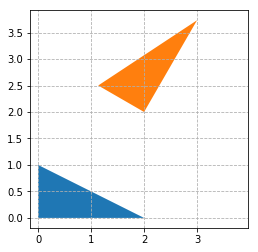

In [2]:
A = np.array([0,0,0,1])
B = np.array([2,0,0,1])
C = np.array([0,1,0,1])
H = np.dot(MT(2,2,0),MR(pi/3))

A1 = np.dot(H,A)
B1 = np.dot(H,B)
C1 = np.dot(H,C)

plt.fill([A[0],B[0],C[0]],[A[1],B[1],C[1]])
plt.fill([A1[0],B1[0],C1[0]],[A1[1],B1[1],C1[1]])
plt.axis('square')
plt.grid(ls="--");



## No elemental

In [3]:
class RigidBody(object):
    """
    Define un cuerpo rígido en el plano mediante un sistema de partículas (puntos) 
    que lo conforman.
    """
    def __init__(self,points):
        self.points = points # Puntos que conforman el sólido rígido
        
    def rotate(self,angle,axis="z"):
        """
        Rota el cuerpo rígido un ángulo determinado alrededor 
        de un eje coordenado.
        """
        _points = [] 
        for p in self.points:
            Q = np.array([p[0],p[1],0,1]) # Coords. Homog.
            R = MR(angle,axis) # Aplicando rotación
            _points.append(np.dot(R,Q))
        self.points = _points
    
    def move(self,q):
        """
        Traslada el cuerpo rígido un vector q
        """
        _points = [] 
        for p in self.points:
            Q = np.array([p[0],p[1],0,1]) # Coords. Homog.
            R = MT(q[0],q[1],q[2]) # Aplicando rotación
            _points.append(np.dot(R,Q))
        self.points = _points
        
    def scale(self,sf):
        """
        Escala el cuerpo rígido
        """
        _points = [] 
        for p in self.points:
            Q = np.array([p[0],p[1],0,1]) # Coords. Homog.
            S = self.SM(sf) # Aplicando escalado
            _points.append(np.dot(S,Q))
        self.points = _points
    
    def perspective(self,w):
        """
        Escala el cuerpo rígido
        """
        _points = [] 
        for p in self.points:
            Q = np.array([p[0],p[1],0,1]) # Coords. Homog.
            P = self.PM(w)
            _points.append(np.dot(P,Q))
        self.points = _points
        
    def SM(self,sf):
        M = np.array([[sf,0,0,0],
                      [0,sf,0,0],
                      [0,0,sf,0],
                      [0,0,0,sf]])
        return M
        
    def PM(self,w):
        M = np.array([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,1,0],
                      [w[0],w[1],w[2],1]])
        return M
        
    def draw(self,color="r"):
        """
        Dibuja el cuerpo rígido en sus estatus actual
        """
        X,Y = [],[]
        for p in self.points:
            X.append(p[0])
            Y.append(p[1])
        plt.fill(X,Y,color)
        plt.axis('equal')
        plt.grid(ls="--")

In [4]:
from scipy.spatial import ConvexHull
#points = np.random.rand(100, 2)   # 30 random points in 2-D
hull = ConvexHull(points)
points = points[hull.vertices]

r = RigidBody(points)
r.draw("r")
r.rotate(pi)
r.draw("g")
r.move([2,2,0])
r.draw("b")
r.rotate(pi/2)
r.draw("y")
r.scale(3)
r.draw("m")


NameError: name 'points' is not defined

In [ ]:
class RigidBody2(object):
    """
    Define un cuerpo rígido en el plano mediante un sistema de partículas (puntos) 
    que lo conforman.
    """
    def __init__(self,points):
        self._points = points # Puntos que conforman el sólido rígido
        self.Hs = [np.eye(4),] # Matrices de transformación
    
    @property
    def points(self):
        _points = [] 
        H = self.H # Aplicando MTH
        for p in self._points:
            Q = np.array([p[0],p[1],0,1]) # Coords. Homog.
            _points.append(np.dot(H,Q))
        return _points
    
    @property
    def H(self):
        _h = np.eye(4)
        for _mth in self.Hs:
            _h = np.dot(_h,_mth)
        return _h
    
    def rotate(self,angle,axis="z"):
        """
        Rota el cuerpo rígido un ángulo determinado alrededor 
        de un eje coordenado.
        """
        R = MR(angle,axis) # Aplicando rotación
        self.Hs.append(R)
    
    def move(self,q):
        """
        Traslada el cuerpo rígido un vector q
        """
        T = MT(q[0],q[1],q[2]) # Aplicando traslación
        self.Hs.append(T)
        
    def scale(self,sf):
        """
        Escala el cuerpo rígido
        """
        #S = self.SM(sf) # Aplicando escalado
        #self.Hs.append(S)
        pass

    def SM(self,sf):
        M = np.array([[sf,0,0,0],
                      [0,sf,0,0],
                      [0,0,sf,0],
                      [0,0,0,sf]])
        return M
        
    def draw(self,color="r"):
        """
        Dibuja el cuerpo rígido en sus estatus actual
        """
        X,Y = [],[]
        for p in self.points:
            X.append(p[0])
            Y.append(p[1])
        plt.fill(X,Y,color)
        plt.axis('equal')
        plt.grid(ls="--")

In [ ]:
points = [(0,0),(0,1),(2,0)]
rx = RigidBody2(points)
rx.draw("r")
rx.rotate(pi)
rx.draw("g")
rx.move([5,0,0])
rx.draw("b")